In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("AirQualityUCI_average_of_the_day.csv",index_col='DATE',header=0,parse_dates=[0])
df.head()

,CO.R,CO.T,NMHC.R,NMHC.T,NOx.R,NOx.T,NO2.R,NO2.T,C6H6.R,O3.T,T,RH,AH
DATE,,,,,,,,,,,,,
38056,1.966667,1316.500000,86.500000,912.250000,132.000000,1167.250000,108.833333,1545.333333,8.460790,1096.041667,12.020833,54.883334,0.765626
38057,2.179444,1244.062500,104.500000,851.802083,140.068056,1277.187500,99.716667,1522.697917,7.989058,885.031250,9.833333,64.069791,0.775768
38058,2.734722,1281.562500,156.062500,1008.229167,170.122222,1101.718750,108.893056,1627.218750,12.129509,1084.218750,11.292708,51.107292,0.663102
38059,2.645833,1330.555556,139.250000,992.822917,181.293056,993.159722,117.006944,1595.621528,10.922887,1245.781250,12.866319,51.530903,0.732294
38060,2.442361,1360.927083,116.958333,943.854167,144.952778,1001.104167,111.131944,1602.187500,9.631442,1234.177083,16.016667,48.843750,0.849674


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 38056 to 38446
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO.R    391 non-null    float64
 1   CO.T    391 non-null    float64
 2   NMHC.R  391 non-null    float64
 3   NMHC.T  391 non-null    float64
 4   NOx.R   391 non-null    float64
 5   NOx.T   391 non-null    float64
 6   NO2.R   391 non-null    float64
 7   NO2.T   391 non-null    float64
 8   C6H6.R  391 non-null    float64
 9   O3.T    391 non-null    float64
 10  T       391 non-null    float64
 11  RH      391 non-null    float64
 12  AH      391 non-null    float64
dtypes: float64(13)
memory usage: 42.8 KB


# CO

In [6]:
dftest=adfuller(df['CO.T'])
dftest

(-9.64720667383919,
 1.4669622995917e-16,
 1,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 4517.9994911789045)

Since, p-value is  0.02869043799310456<0.05. We will conclude that series is stationary

In [7]:
from pmdarima import auto_arima

stepwise_fit=auto_arima(df['CO.T'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4737.851, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5006.955, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4751.337, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4799.504, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6596.770, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4738.024, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4735.820, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4736.471, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4733.794, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4735.453, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4737.453, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.334 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  391
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2362.897
Date:                Tue, 16 Nov 2021   AIC                           4733.794
Time:                        22:25:43   BIC                           4749.669
Sample:                             0   HQIC                          4740.086
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    411.4261     45.103      9.122      0.000     323.027     499.826
ar.L1          0.8488      0.051     16.598      0.000       0.749       0.949
ar.L2         -0.2216      0.047     -4.764      0.000      -0.313      -0.130
sigma2      1.036e+04    658.561     15.738      0.000    9073.992    1.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.81
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.98   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
train=df[1:df.shape[0]-100]
test=df[df.shape[0]-100:]

In [9]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['CO.T'],order=(2,0,0))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   CO.T   No. Observations:                  290
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1742.690
Date:                Tue, 16 Nov 2021   AIC                           3493.381
Time:                        22:26:01   BIC                           3508.060
Sample:                             0   HQIC                          3499.262
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1100.2530     17.469     62.981      0.000    1066.013    1134.493
ar.L1          0.8762      0.060     14.485      0.000       0.758       0.995
ar.L2         -0.2208      0.054     -4.064      0.000      -0.327      -0.114
sigma2      9694.0659    682.062     14.213      0.000    8357.250     1.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.40
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               1.98   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
38346    1328.962652
38347    1225.832555
38348    1159.791631
38349    1124.695017
38350    1108.523838
            ...     
38441    1100.253006
38442    1100.253006
38443    1100.253006
38444    1100.253006
38445    1100.253006
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

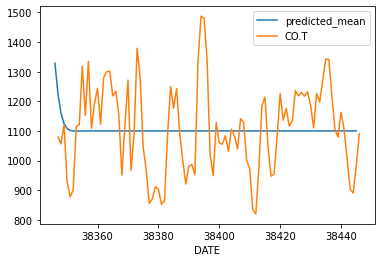

In [12]:
pred.plot(legend=True)
test['CO.T'].plot(legend=True)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['CO.T']))
rmse

150.81489426201068

# NMHC.T

In [16]:
stepwise_fit=auto_arima(df['NMHC.T'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4849.364, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4942.858, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4943.982, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4943.172, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4940.859, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4852.243, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4848.422, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4864.821, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4926.048, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4849.417, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4910.577, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4851.050, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4846.661, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4863.174, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  391
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2419.330
Date:                Tue, 16 Nov 2021   AIC                           4846.661
Time:                        22:28:49   BIC                           4862.525
Sample:                             0   HQIC                          4852.950
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6785      0.053     12.846      0.000       0.575       0.782
ar.L2         -0.2233      0.051     -4.338      0.000      -0.324      -0.122
ma.L1         -0.9551      0.017    -54.870      0.000      -0.989      -0.921
sigma2      1.425e+04    974.312     14.623      0.000    1.23e+04    1.62e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.81   Prob(JB):                         0.59
Heteroskedasticity (H):               1.72   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
train=df[1:df.shape[0]-100]
test=df[df.shape[0]-100:]

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['NMHC.T'],order=(2,1,1))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 NMHC.T   No. Observations:                  290
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1785.530
Date:                Tue, 16 Nov 2021   AIC                           3579.060
Time:                        22:29:50   BIC                           3593.726
Sample:                             0   HQIC                          3584.937
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6894      0.060     11.469      0.000       0.572       0.807
ar.L2         -0.2485      0.059     -4.215      0.000      -0.364      -0.133
ma.L1         -0.9615      0.018    -53.286      0.000      -0.997      -0.926
sigma2      1.352e+04   1025.496     13.184      0.000    1.15e+04    1.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.68
Prob(Q):                              0.79   Prob(JB):                         0.16
Heteroskedasticity (H):               1.77   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
38346    1015.499070
38347     997.890888
38348    1001.982022
38349    1009.177443
38350    1013.121564
            ...     
38441    1013.034600
38442    1013.034600
38443    1013.034600
38444    1013.034600
38445    1013.034600
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

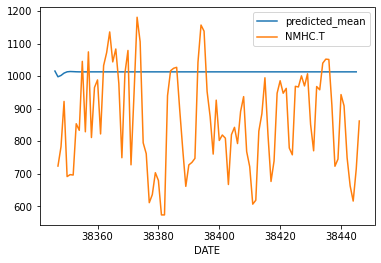

In [21]:
pred.plot(legend=True)
test['NMHC.T'].plot(legend=True)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['NMHC.T']))
rmse

209.76686403493903

# NOx.T

In [23]:
stepwise_fit=auto_arima(df['NOx.T'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4896.268, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4986.245, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4986.914, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4985.578, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4984.267, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4897.477, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4898.266, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4896.402, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4899.298, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4897.451, Time=0.21 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  391
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2442.134
Date:                Tue, 16 Nov 2021   AIC                           4896.268
Time:                        22:32:11   BIC                           4920.065
Sample:                             0   HQIC                          4905.702
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3246      0.193     -1.680      0.093      -0.703       0.054
ar.L1          0.7367      0.295      2.499      0.012       0.159       1.314
ar.L2         -0.2222      0.182     -1.220      0.222      -0.579       0.135
ma.L1         -1.0286      0.296     -3.472      0.001      -1.609      -0.448
ma.L2          0.0473      0.292      0.162      0.872      -0.525       0.620
sigma2        1.6e+04    714.579     22.390      0.000    1.46e+04    1.74e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1280.85
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
train=df[1:df.shape[0]-100]
test=df[df.shape[0]-100:]

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['NOx.T'],order=(2,1,2))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  war

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  NOx.T   No. Observations:                  290
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1817.597
Date:                Tue, 16 Nov 2021   AIC                           3645.193
Time:                        22:33:14   BIC                           3663.525
Sample:                             0   HQIC                          3652.539
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8683      0.316      2.752      0.006       0.250       1.487
ar.L2         -0.3240      0.171     -1.892      0.059      -0.660       0.012
ma.L1         -1.2025      0.326     -3.692      0.000      -1.841      -0.564
ma.L2          0.2406      0.314      0.765      0.444      -0.376       0.857
sigma2      1.691e+04    607.299     27.843      0.000    1.57e+04    1.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1501.81
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                             2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
38346    698.287392
38347    783.988377
38348    815.961331
38349    815.954801
38350    805.589209
            ...    
38441    793.213499
38442    793.213499
38443    793.213499
38444    793.213499
38445    793.213499
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

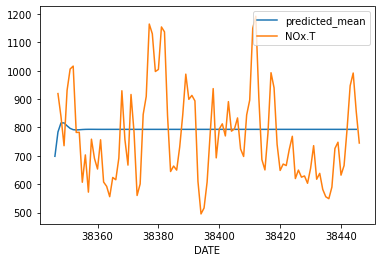

In [29]:
pred.plot(legend=True)
test['NOx.T'].plot(legend=True)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['NOx.T']))
rmse

163.27950411508115

# NO2

In [31]:
stepwise_fit=auto_arima(df['NO2.T'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4913.767, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4987.645, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4987.708, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4986.086, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4985.661, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4913.896, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4911.999, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4940.623, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4964.596, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4913.835, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4957.714, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4915.669, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4910.862, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4940.268, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  391
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2451.431
Date:                Tue, 16 Nov 2021   AIC                           4910.862
Time:                        22:34:54   BIC                           4926.727
Sample:                             0   HQIC                          4917.151
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8401      0.055     15.145      0.000       0.731       0.949
ar.L2         -0.2909      0.053     -5.516      0.000      -0.394      -0.188
ma.L1         -0.9222      0.022    -42.564      0.000      -0.965      -0.880
sigma2      1.682e+04   1023.925     16.428      0.000    1.48e+04    1.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.34
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
train=df[1:df.shape[0]-100]
test=df[df.shape[0]-100:]

In [43]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['NO2.T'],order=(2,1,1))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  NO2.T   No. Observations:                  290
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1817.415
Date:                Tue, 16 Nov 2021   AIC                           3642.830
Time:                        22:44:56   BIC                           3657.495
Sample:                             0   HQIC                          3648.706
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8225      0.064     12.813      0.000       0.697       0.948
ar.L2         -0.2936      0.060     -4.919      0.000      -0.411      -0.177
ma.L1         -0.9330      0.022    -42.677      0.000      -0.976      -0.890
sigma2       1.69e+04   1114.878     15.154      0.000    1.47e+04    1.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                32.23
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
38346    1344.637782
38347    1305.852566
38348    1287.009144
38349    1282.899099
38350    1285.051497
            ...     
38441    1290.028833
38442    1290.028833
38443    1290.028833
38444    1290.028833
38445    1290.028833
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

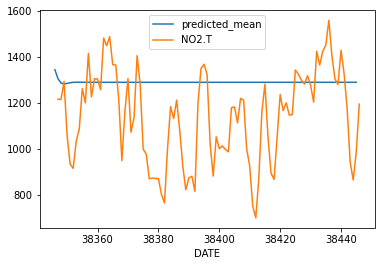

In [46]:
pred.plot(legend=True)
test['NO2.T'].plot(legend=True)

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['NO2.T']))
rmse

248.84797960459392

# C6H6

In [51]:
stepwise_fit=auto_arima(df['C6H6.R'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2069.260, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2250.361, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2076.394, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2093.260, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2987.644, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2067.353, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2067.033, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2068.015, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2066.052, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2067.411, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2065.492, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2067.396, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2069.404, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2152.948, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  391
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1028.746
Date:                Tue, 16 Nov 2021   AIC                           2065.492
Time:                        22:45:50   BIC                           2081.367
Sample:                             0   HQIC                          2071.784
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7741      0.508      9.402      0.000       3.779       5.769
ar.L1          0.7098      0.048     14.876      0.000       0.616       0.803
ar.L2         -0.1804      0.047     -3.875      0.000      -0.272      -0.089
sigma2        11.2788      0.746     15.129      0.000       9.818      12.740
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.57
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
train=df[1:df.shape[0]-100]
test=df[df.shape[0]-100:]

In [53]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['C6H6.R'],order=(2,0,0))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 C6H6.R   No. Observations:                  290
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -763.755
Date:                Tue, 16 Nov 2021   AIC                           1535.509
Time:                        22:46:08   BIC                           1550.189
Sample:                             0   HQIC                          1541.391
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8197      0.427     25.338      0.000       9.983      11.657
ar.L1          0.7111      0.055     12.910      0.000       0.603       0.819
ar.L2         -0.2157      0.053     -4.055      0.000      -0.320      -0.111
sigma2        11.3319      0.854     13.270      0.000       9.658      13.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                30.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
38346    11.169763
38347    10.576297
38348    10.571142
38349    10.695461
38350    10.784977
           ...    
38441    10.819741
38442    10.819741
38443    10.819741
38444    10.819741
38445    10.819741
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

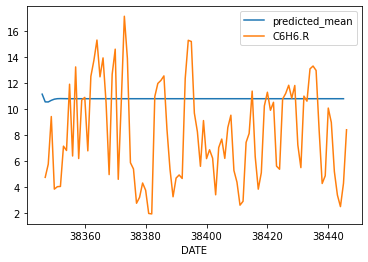

In [56]:
pred.plot(legend=True)
test['C6H6.R'].plot(legend=True)

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['C6H6.R']))
rmse

4.561124694461619

# O3

In [58]:
stepwise_fit=auto_arima(df['O3.T'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5307.748, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5407.664, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5409.518, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5409.418, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5405.664, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5315.327, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5307.392, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5392.845, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5307.482, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5371.021, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5305.394, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5333.365, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  391
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2648.697
Date:                Tue, 16 Nov 2021   AIC                           5305.394
Time:                        23:09:36   BIC                           5321.258
Sample:                             0   HQIC                          5311.683
                                - 391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7587      0.046     16.341      0.000       0.668       0.850
ar.L2         -0.2785      0.044     -6.305      0.000      -0.365      -0.192
ma.L1         -0.9668      0.015    -63.600      0.000      -0.997      -0.937
sigma2      4.616e+04   2955.183     15.619      0.000    4.04e+04     5.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 9.08
Prob(Q):                              0.71   Prob(JB):                         0.01
Heteroskedasticity (H):               2.84   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
train=df[1:df.shape[0]-100]
test=df[df.shape[0]-100:]

In [60]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['O3.T'],order=(2,1,1))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting param

In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   O3.T   No. Observations:                  290
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1923.248
Date:                Tue, 16 Nov 2021   AIC                           3854.496
Time:                        23:10:34   BIC                           3869.161
Sample:                             0   HQIC                          3860.372
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7878      0.063     12.560      0.000       0.665       0.911
ar.L2         -0.2948      0.058     -5.075      0.000      -0.409      -0.181
ma.L1         -0.9520      0.022    -42.374      0.000      -0.996      -0.908
sigma2       3.51e+04   2730.335     12.854      0.000    2.97e+04    4.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.72   Prob(JB):                         0.45
Heteroskedasticity (H):               1.84   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
38346    1455.930678
38347    1255.142815
38348    1192.983458
38349    1203.205687
38350    1229.582493
            ...     
38441    1249.286529
38442    1249.286529
38443    1249.286529
38444    1249.286529
38445    1249.286529
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

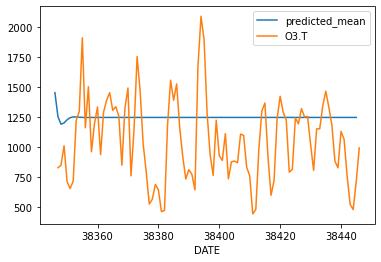

In [63]:
pred.plot(legend=True)
test['O3.T'].plot(legend=True)

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['O3.T']))
rmse

393.0895708121132